# Project Final Submission

You must sign up for a canvas Project Group on the People page even if you're working alone.

Student 1: Ding Ma

Student 2: Hawk Zhang
    
Canvas Project Group Number: 120

### Step 1a: Planning 
#### Identify the information in the file your program will read

For each country:
- The country name
- Unemployment rate (%)
- GDP per capita (in US Dollars, $)
- Goverment type (few countries are labeled as "n/a")
- Total population 

### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

Possible Program Outputs:
- (Chosen) Scatter plot of unemployment rate vs GDP per capita. Compute a line/curve of best fit if there is a graphical relationship, or, find and plot the mean of both axis if there's a distinct distribution density.
- Bar chart of government type vs average unemployment rate. Employment rate of each goverment type will be averaged, as well, the government types will be ordered on the axis based on increasing average unemployment rate. 
- Scatter plot of unemployment rate vs population. Compute a line/curve of best fit if there is a graphical relationship, or, find the median of both axis if there's a distinct distribution density.
- For either scatter plot, if the data shows a strong enough graphical relationship, a line graph could better represent it. We can determine the specific type of mathematical relationship by looking at the shape of the line/curve, and possibly compute an equation for the graph.

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

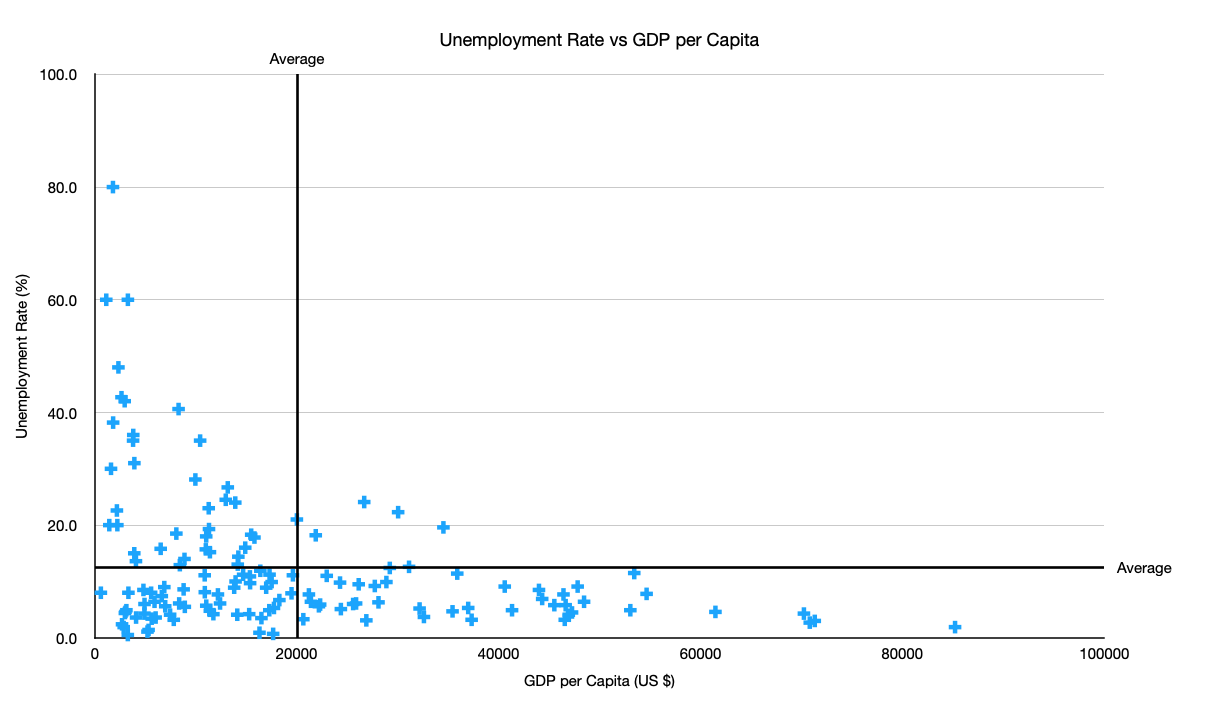

### Step 2a: Building
#### Document which information you will represent in your data definitions
#### Design data definitions

Since we are only interested in the relationship between gdp per capita and unemployment rate, and based on our example scatter plot, the only data we need form the csv file is unemplyment rate and gdp_per_cap. Other things like government type, population, and country name is useless for our program output.

In [1]:
from cs103 import *
from typing import NamedTuple, List
import csv


##################
# Data Definitions

Country = NamedTuple('Country',[('unemployment_rate', float), # float in range (0.0, 100)
                                ('gdp_per_cap', float)]) # float in range [0.0, ...)
                       
# interp. a Country with its unemployment rate (in %) and gdp per capita (in USD)

C0 = Country(19.3, 11305.0)
C1 = Country(11.2, 14687.0)
C2 = Country(11.0, 22968.0)

@typecheck
# template based on compound
def fn_for_country(c: Country) -> ...:
    return ...(c.unemployment_rate,
                c.gdp_per_cap)


# List[Country]
# interp. a list of Country

LOC0 = []
LOC1 = [C0, C1, C2]

@typecheck
# template based on arbitary sized and the reference rule
def fn_for_loc(loc: List[Country]) -> ...:
    # description of acc
    acc = ... # type: ...
    for c in loc:
        acc= ...(acc, fn_for_country)
    return acc

<>:21: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:37: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:21: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:37: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
/tmp/ipykernel_31/1638409033.py:21: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
  return ...(c.unemployment_rate,
/tmp/ipykernel_31/1638409033.py:37: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
  acc= ...(acc, fn_for_country)


### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data

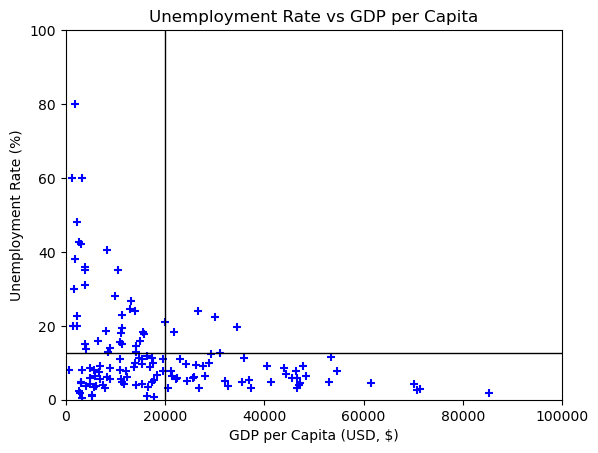

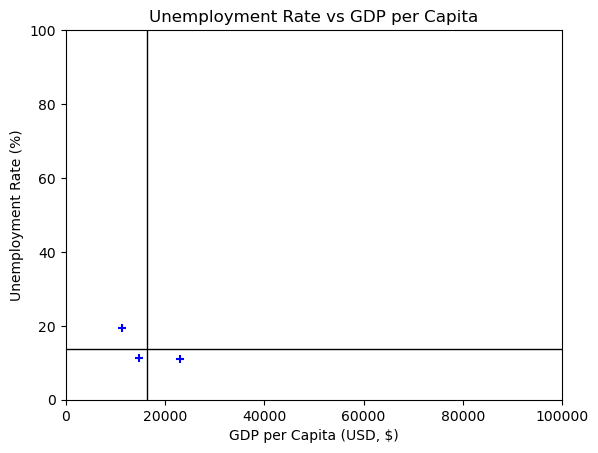

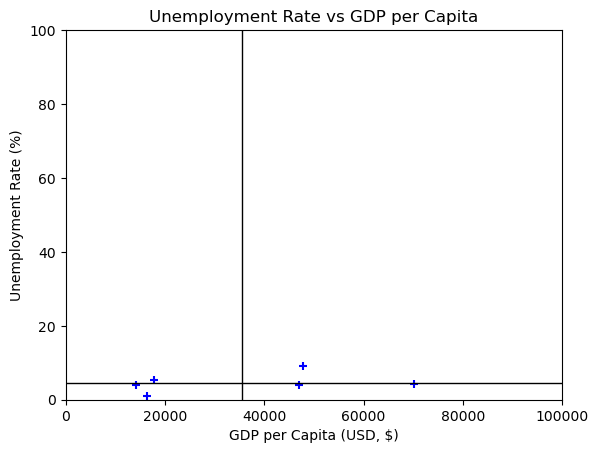

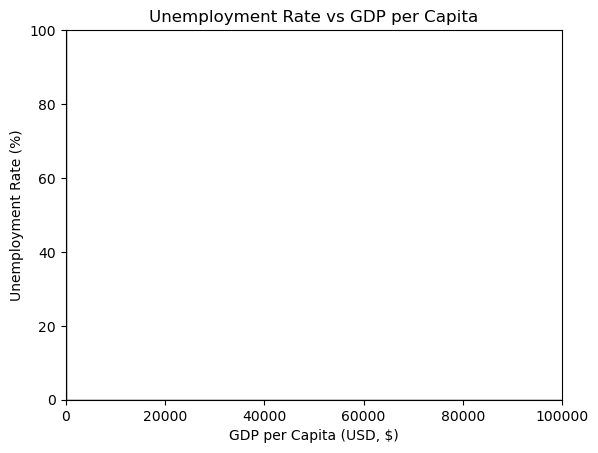

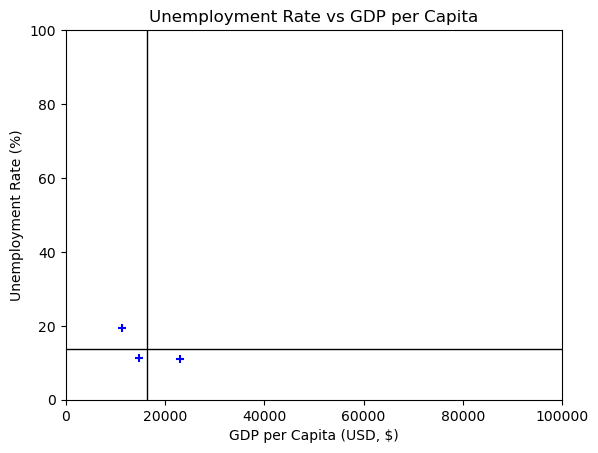

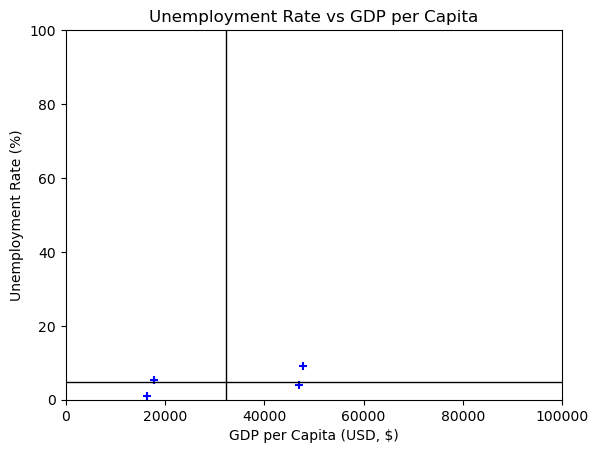

21 of 21 tests passed


In [2]:
###########
# Functions

import matplotlib.pyplot as plt


@typecheck
def main(filename: str) -> None:
    '''
    reads information from a given filename and returns a scatter plot of Unemployment Rate vs GDP per Capita
    with mean values shown for both axis as reference lines
    '''
    # template form HtDAP and based on fuction composition
    return final_plot(read(filename))


@typecheck
def read(filename: str) -> List[Country]:
    """    
    reads information from the specified file and returns a list of Country
    """
    # return [] # stub
    # template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[Country]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            c = Country(parse_float(row[2]), parse_float(row[3]))
            loc.append(c)
    
    return loc


# analyze function
@typecheck
def final_plot(loc: List[Country]) -> None:
    """
    takes in a list of Country, and displays a scatterplot of unemployment rate vs. gdp per capita, 
    unemplotment rate is measured in percent (%), gdp per capita is measured in USD ($), with a 
    reference line for both axis that shows the average value
    Assumes non-empty list
    """
    # return None # stub
    # template based on function composition 
    return show_scatterplot(axis_x(loc), axis_y(loc), get_mean_gdp(loc), get_mean_unemploy(loc))


@typecheck
def show_scatterplot(gdp: List[float], up_rate: List[float], avg_gdp: float, avg_rate: float) -> None:
    """
    display a scatterplot of unemployment rate vs. gdp per capita, unemplotment rate is measured 
    in percent (%), gdp per capita is measured in USD ($), with a reference line for both axis that
    shows the average value
    """
    # return None #stub
    # template based on visualization
    
    # axis labels and title
    plt.xlabel('GDP per Capita (USD, $)')
    plt.ylabel('Unemployment Rate (%)')
    plt.title('Unemployment Rate vs GDP per Capita')

    # range for the axes
    # [x-min, x-max, y-min, y-max]
    plt.axis([0.0, 100000.0, 0.0, 100.0])

    # create the scatterplot and reference lines
    plt.scatter(gdp, up_rate , marker = '+', c = 'b')
    plt.axvline(x = avg_gdp, c = 'black', linewidth = 1.0)
    plt.axhline(y = avg_rate, c = 'black', linewidth = 1.0)
    
    # show the plot
    plt.show()
    
    return None


@typecheck
def axis_y(loc: List[Country]) -> List[float]:
    """
    takes a list of Country and returns a list of floats that are only the percent unemployment rate
    """
    # return [] # stub
    # template from List[Country]
    # acc is the result so far
    acc = [] # type: List[float]
    for c in loc:
        acc.append(c.unemployment_rate)
    return acc


@typecheck
def axis_x(loc: List[Country]) -> List[float]:
    """
    takes a list of Country and returns a list of floats that are only the gdp_per_cap
    """
    # return [] # stub
    # template from List[Country]
    # acc is the result so far
    acc = [] # type: List[float]
    for c in loc:
        acc.append(c.gdp_per_cap)
    return acc


@typecheck
def count_countries(loc: List[Country]) -> int:
    '''
    takes a list of Country and returns the number of items in the list
    '''
    # return 2 # stub
    # template based on List[Country]
    # acc contains total number
    acc = 0 # type: float
    for c in loc:
        acc = (acc + 1)
    return acc


@typecheck
def get_mean_gdp(loc: List[Country]) -> float:
    '''
    takes a list of Country and return the mean of their GDP per cap in USD
    Assumes non-empty list
    '''
    # return 1.0 # stub
    # template from List[Country]
    # acc contains total GDP per cap
    acc = 0.0 # type: float
    for c in loc:
        acc = (acc + c.gdp_per_cap)
    return acc/count_countries(loc)


@typecheck
def get_mean_unemploy(loc: List[Country]) -> float:
    '''
    takes a list of Country and return the mean of their unemployment rate in %
    Assumes non-empty list
    '''
    # return 1.0 # stub
    # template from List[Country]
    # acc contains total unemployment rate
    acc = 0.0 # type: float
    for c in loc:
        acc = (acc + c.unemployment_rate)
    return acc/count_countries(loc)


# all examples and tests
start_testing()

# examples and tests for main()
expect(main("country_per_cap_gdp_unemployment_gov_type_pop.csv"), None)

# examples and tests for read()
expect(read('test_1.csv'), [C0, C1, C2])
expect(read('test_2.csv'), [Country(9.1, 47824.0), Country(5.3, 17740.0), Country(4.1, 46946.0), 
                            Country(0.9, 16306.0), Country(4.1, 14107.0), Country(4.3, 70238.0)])

# examples and tests for final_plot()
expect(final_plot([C0, C1, C2]), None)
expect(final_plot([Country(9.1, 47824.0), Country(5.3, 17740.0), Country(4.1, 46946.0), 
                    Country(0.9, 16306.0), Country(4.1, 14107.0), Country(4.3, 70238.0)]), None)

#examples and test for show_scatterplot()
expect(show_scatterplot([],  [], 0, 0), None)     
expect(show_scatterplot([11305.0, 14687.0, 22968.0], [19.3, 11.2, 11.0], 16320.0, 13.8), None)
expect(show_scatterplot([47824.0, 17740.0, 46946.0, 16306.0], [9.1, 5.3, 4.1, 0.9], 32204.0, 4.9), None)


# examples and tests for axis_y()
expect(axis_y([]), [])
expect(axis_y(LOC1), [19.3, 11.2, 11.0])
expect(axis_y([Country(9.1, 47824.0), Country(5.3, 17740.0), Country(4.1, 46946.0), 
                    Country(0.9, 16306.0)]), [9.1, 5.3, 4.1, 0.9])

# examples and tests for axis_x()
expect(axis_x([]), [])
expect(axis_x(LOC1), [11305.0, 14687.0, 22968.0])
expect(axis_x([Country(9.1, 47824.0), Country(5.3, 17740.0), Country(4.1, 46946.0), 
                    Country(0.9, 16306.0)]), [47824.0, 17740.0, 46946.0, 16306.0])

# examples and tests for count_countries()
expect(count_countries([]), 0)
expect(count_countries([C0, C1, C2]), 3)
expect(count_countries([C0, C1]), 2)

# examples and tests for get_mean_gdp()
expect(get_mean_gdp([C0, C1, C2]), (11305.0 + 14687.0 + 22968.0)/3)
expect(get_mean_gdp([C0, C1]), (11305.0 + 14687.0)/2)

# examples and tests for get_mean_unemploy()
expect(get_mean_unemploy([C0, C1, C2]), (19.3 + 11.2 + 11.0)/3)
expect(get_mean_unemploy([C0, C1]), (19.3 + 11.2)/2)

summary()
# finish testing

### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

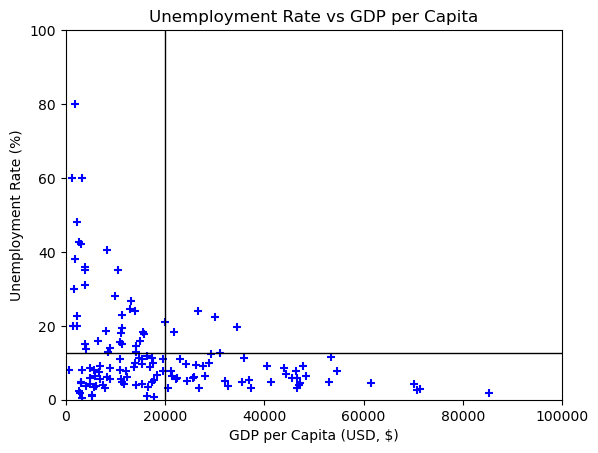

In [3]:
main("country_per_cap_gdp_unemployment_gov_type_pop.csv")

In [ ]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 53525
ASSIGNMENT = 596984 # Final submission

submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT by downloading your files and uploading them 
# to Canvas. You can learn how on the page "How to submit your Jupyter notebook" 
# on our Canvas site.

We can't seem to find your token, if you need help finding it please see:
https://documentcloud.adobe.com/link/track?uri=urn%3Aaaid%3Ascds%3AUS%3A5a18408c-2102-4dc5-8f50-f8205f9b85bf
Please copy and paste your token here and then hit enter:
